In [ ]:
# 일자별 차트 크롤링
# 1등 가져오기
# 전체 순위가져 오기 

In [ ]:
# !pip install matplotlib

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate=" 
url = url + str(20221204)

html = requests.get(url)
soup = bs(html.text, "html.parser")

bugs_day=[]
tbody=soup.find("tbody")
tr_soup=tbody.find_all("tr")

for tr in tr_soup:
    rank=tr.find("div", class_="ranking").get_text().split("\n")[1]
    title=tr.find("p", class_="title").get_text().replace("\n", "")
    art=tr.find("p", class_="artist").get_text().replace("\n", "")
    album=tr.find("a", class_="album").get_text().replace("\n", "")
    bugs_day.append([rank, title, art, album])
    
# bugs_day
df=pd.DataFrame(bugs_day, columns=["순위", "곡명", "아티스트", "앨범"])
df

,순위,곡명,아티스트,앨범
0,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...
1,2,WHEN I MOVE,카라(Kara),MOVE AGAIN
2,3,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans'
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE
4,5,Dreamers [Music from the FIFA World Cup Qatar ...,정국\r정국\r,Dreamers [Music from the FIFA World Cup Qatar ...
...,...,...,...,...
95,96,모든 계절은 너였다,길구봉구,모든 계절은 너였다
96,97,가을밤에 든 생각,잔나비,잔나비 소곡집 l
97,98,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9
98,99,MY BAG,(여자)아이들,I NEVER DIE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
# 순위에 따라서 점수 부여
# 1등 -> 100점, 100등 -> 1점

In [ ]:
score=[]
for i in range(100):
    score.append(101-int(df.loc[i, "순위"]))
df["점수"]=score
df

,순위,곡명,아티스트,앨범,점수
0,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...,100
1,2,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',99
2,3,WHEN I MOVE,카라(Kara),MOVE AGAIN,98
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE,97
4,5,After LIKE,IVE (아이브),After LIKE,96
...,...,...,...,...,...
95,96,아저씨,릴러말즈 (Leellamarz)\r릴러말즈 (Leellamarz)\r,쇼미더머니 11 Episode 1,5
96,97,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,4
97,98,Last Christmas,Wham!(왬),LAST CHRISTMAS,3
98,99,MY BAG,(여자)아이들,I NEVER DIE,2


In [ ]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 1.9 MB/s eta 0:00:00


In [ ]:

# 시작일부터 종료일까지 날짜 입력후 list로 생성
from tqdm import tqdm
import pandas as pd
sdt=input("시작일 입력:")
edt=input("종료일 입력:")

dates=pd.date_range(sdt, edt)
dates=[i.strftime("%Y%m%d") for i in dates]
#print(dates)

df_bugs=pd.DataFrame()

for date in tqdm(dates):
    url="https://music.bugs.co.kr/chart/track/day/total?chartdate=" + str(date)
    
    html=requests.get(url)
    soup = bs(html.text, "html.parser")
    
    bugs_day=[]
    tbody=soup.find("tbody")
    tr_soup=tbody.find_all("tr")
    
    scr=101   # 점수 초기값
    for tr in tr_soup:
        rank=tr.find("div", class_="ranking").get_text().split("\n")[1]
        title=tr.find("p", class_="title").get_text().replace("\n", "")
        art=tr.find("p", class_="artist").get_text().replace("\n", "")
        album=tr.find("a", class_="album").get_text().replace("\n", "")
        scr -= 1  # 1회 추출시 -1 만큼 감소
        bugs_day.append([date, rank, title, art, album, scr])

    # bugs_day
    df=pd.DataFrame(bugs_day, columns=["날짜", "순위","곡명","아티스트",
                                       "앨범","점수"])
    df_bugs=pd.concat([df_bugs, df])
    
df_bugs.reset_index(drop=True, inplace=True) 
#df_bugs=df_bugs.reset_index(drop=True)
df_bugs.info()

100%|██████████| 29/29 [00:20<00:00,  1.42it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      2900 non-null   object
 1   순위      2900 non-null   object
 2   곡명      2900 non-null   object
 3   아티스트    2900 non-null   object
 4   앨범      2900 non-null   object
 5   점수      2900 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 136.1+ KB


In [ ]:
# 특정 기간내에 차트 진입 점수 계산
# 예) 15일간 차트 분석 
# 12월12 일 -> 아이유 150 점, 12월 11일 -> 아이유 160점, 12월 1일  아이유 누적점수 ~~점
# 누적된 점수별 아티스트 계산  상위 10명 을 히스토 그램으로 그려 보세요.

In [ ]:
df_bugs

,날짜,순위,곡명,아티스트,앨범,점수
0,20221114,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...,100
1,20221114,2,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE,99
2,20221114,3,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',98
3,20221114,4,Nxde,(여자)아이들,I love,97
4,20221114,5,After LIKE,IVE (아이브),After LIKE,96
...,...,...,...,...,...,...
2895,20221212,96,아저씨,릴러말즈 (Leellamarz)\r릴러말즈 (Leellamarz)\r,쇼미더머니 11 Episode 1,5
2896,20221212,97,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,4
2897,20221212,98,Last Christmas,Wham!(왬),LAST CHRISTMAS,3
2898,20221212,99,MY BAG,(여자)아이들,I NEVER DIE,2


In [ ]:
df_bugs_top = df_bugs.groupby(["아티스트"]).sum().sort_values("점수", ascending=False).head(10)

/tmp/ipykernel_914/1185843139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_top = df_bugs.groupby(["아티스트"]).sum().sort_values("점수", ascending=False).head(10)


In [ ]:
df_bugs_top

,점수
아티스트,
NewJeans,7708
IVE (아이브),7381
LE SSERAFIM (르세라핌),6296
윤하(Younha/ユンナ),5922
Charlie Puth(찰리 푸스),5680
SECRET NUMBER (시크릿넘버),5566
(여자)아이들,4968
BLACKPINK,4855
Red Velvet (레드벨벳),4543


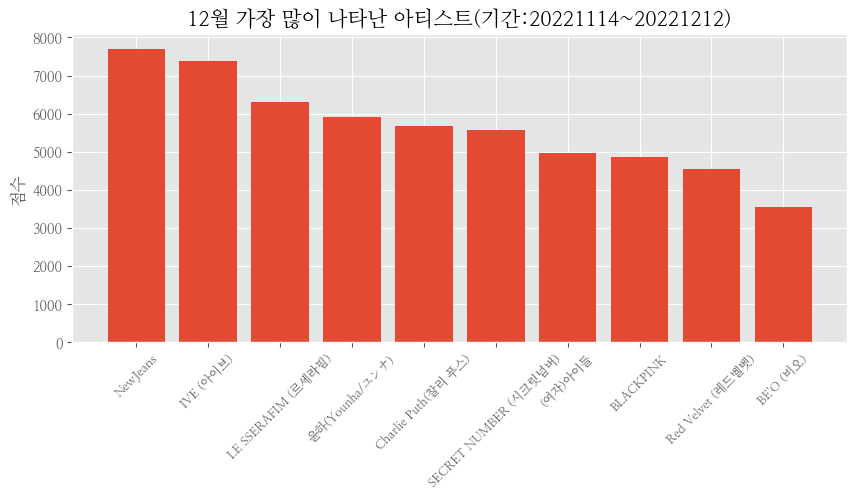

In [ ]:
import matplotlib.pyplot as plt
import platform

plt.rc('font', family = "NanumMyeongjo")

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=45)
plt.bar(df_bugs_top.index, df_bugs_top["점수"])
plt.title(f"12월 가장 많이 나타난 아티스트(기간:{sdt}~{edt})", size=15)
plt.ylabel("점수")
plt.show()

In [ ]:
df_bugs_values = df_bugs.groupby(["아티스트","날짜"]).sum().sort_values("점수", ascending=False)

/tmp/ipykernel_914/886951807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_values = df_bugs.groupby(["아티스트","날짜"]).sum().sort_values("점수", ascending=False)


In [ ]:
df_bugs_top.index

Index(['NewJeans', 'IVE (아이브)', 'LE SSERAFIM (르세라핌)', '윤하(Younha/ユンナ)',
       'Charlie Puth(찰리 푸스)', 'SECRET NUMBER (시크릿넘버)', '(여자)아이들', 'BLACKPINK',
       'Red Velvet (레드벨벳)', 'BE'O (비오)'],
      dtype='object', name='아티스트')

In [ ]:
df_bugs_values_top = df_bugs_values.loc[df_bugs_top.index]

In [ ]:
df_bugs_values_top

점수
아티스트      날짜           
NewJeans  20221114  285
          20221115  283
          20221116  278
          20221210  274
          20221118  272
...                 ...
BE'O (비오) 20221125  112
          20221128  112
          20221122  110
          20221123  107
          20221124   95

[273 rows x 1 columns]

In [ ]:
df_bugs_values_top = df_bugs_values_top.reset_index()

In [ ]:
df_bugs_values_top

,아티스트,날짜,점수
0,NewJeans,20221114,285
1,NewJeans,20221115,283
2,NewJeans,20221116,278
3,NewJeans,20221210,274
4,NewJeans,20221118,272
...,...,...,...
268,BE'O (비오),20221125,112
269,BE'O (비오),20221128,112
270,BE'O (비오),20221122,110
271,BE'O (비오),20221123,107


In [ ]:
df_bugs_values_top_pivot = df_bugs_values_top.pivot("아티스트","날짜","점수")

/tmp/ipykernel_914/2688928874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_bugs_values_top_pivot = df_bugs_values_top.pivot("아티스트","날짜","점수")


In [ ]:
df_bugs_values_top_pivot.fillna(0)

날짜,20221114,20221115,20221116,20221117,20221118,20221119,20221120,20221121,20221122,20221123,...,20221203,20221204,20221205,20221206,20221207,20221208,20221209,20221210,20221211,20221212
아티스트,,,,,,,,,,,,,,,,,,,,,
(여자)아이들,190.0,202.0,192.0,182.0,194.0,178.0,167.0,164.0,163.0,163.0,...,175.0,169.0,168.0,166.0,168.0,168.0,173.0,173.0,168.0,168.0
BE'O (비오),142.0,132.0,123.0,124.0,132.0,133.0,127.0,119.0,110.0,107.0,...,122.0,120.0,125.0,127.0,121.0,123.0,125.0,121.0,120.0,120.0
BLACKPINK,174.0,176.0,169.0,169.0,169.0,173.0,172.0,164.0,155.0,156.0,...,174.0,169.0,170.0,173.0,171.0,172.0,173.0,171.0,170.0,170.0
Charlie Puth(찰리 푸스),193.0,201.0,191.0,191.0,194.0,200.0,189.0,191.0,171.0,178.0,...,202.0,203.0,196.0,203.0,205.0,205.0,205.0,208.0,207.0,207.0
IVE (아이브),256.0,259.0,247.0,255.0,255.0,263.0,254.0,251.0,235.0,245.0,...,267.0,262.0,262.0,260.0,261.0,262.0,264.0,265.0,265.0,265.0
LE SSERAFIM (르세라핌),190.0,183.0,195.0,177.0,181.0,185.0,217.0,225.0,219.0,225.0,...,225.0,230.0,229.0,228.0,222.0,229.0,220.0,213.0,222.0,222.0
NewJeans,285.0,283.0,278.0,269.0,272.0,268.0,269.0,260.0,255.0,258.0,...,271.0,265.0,266.0,269.0,267.0,267.0,270.0,274.0,272.0,272.0
Red Velvet (레드벨벳),32.0,38.0,35.0,35.0,42.0,33.0,22.0,33.0,26.0,28.0,...,237.0,244.0,235.0,223.0,212.0,196.0,169.0,143.0,160.0,160.0
SECRET NUMBER (시크릿넘버),0.0,0.0,478.0,465.0,463.0,502.0,555.0,461.0,435.0,430.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='아티스트'>

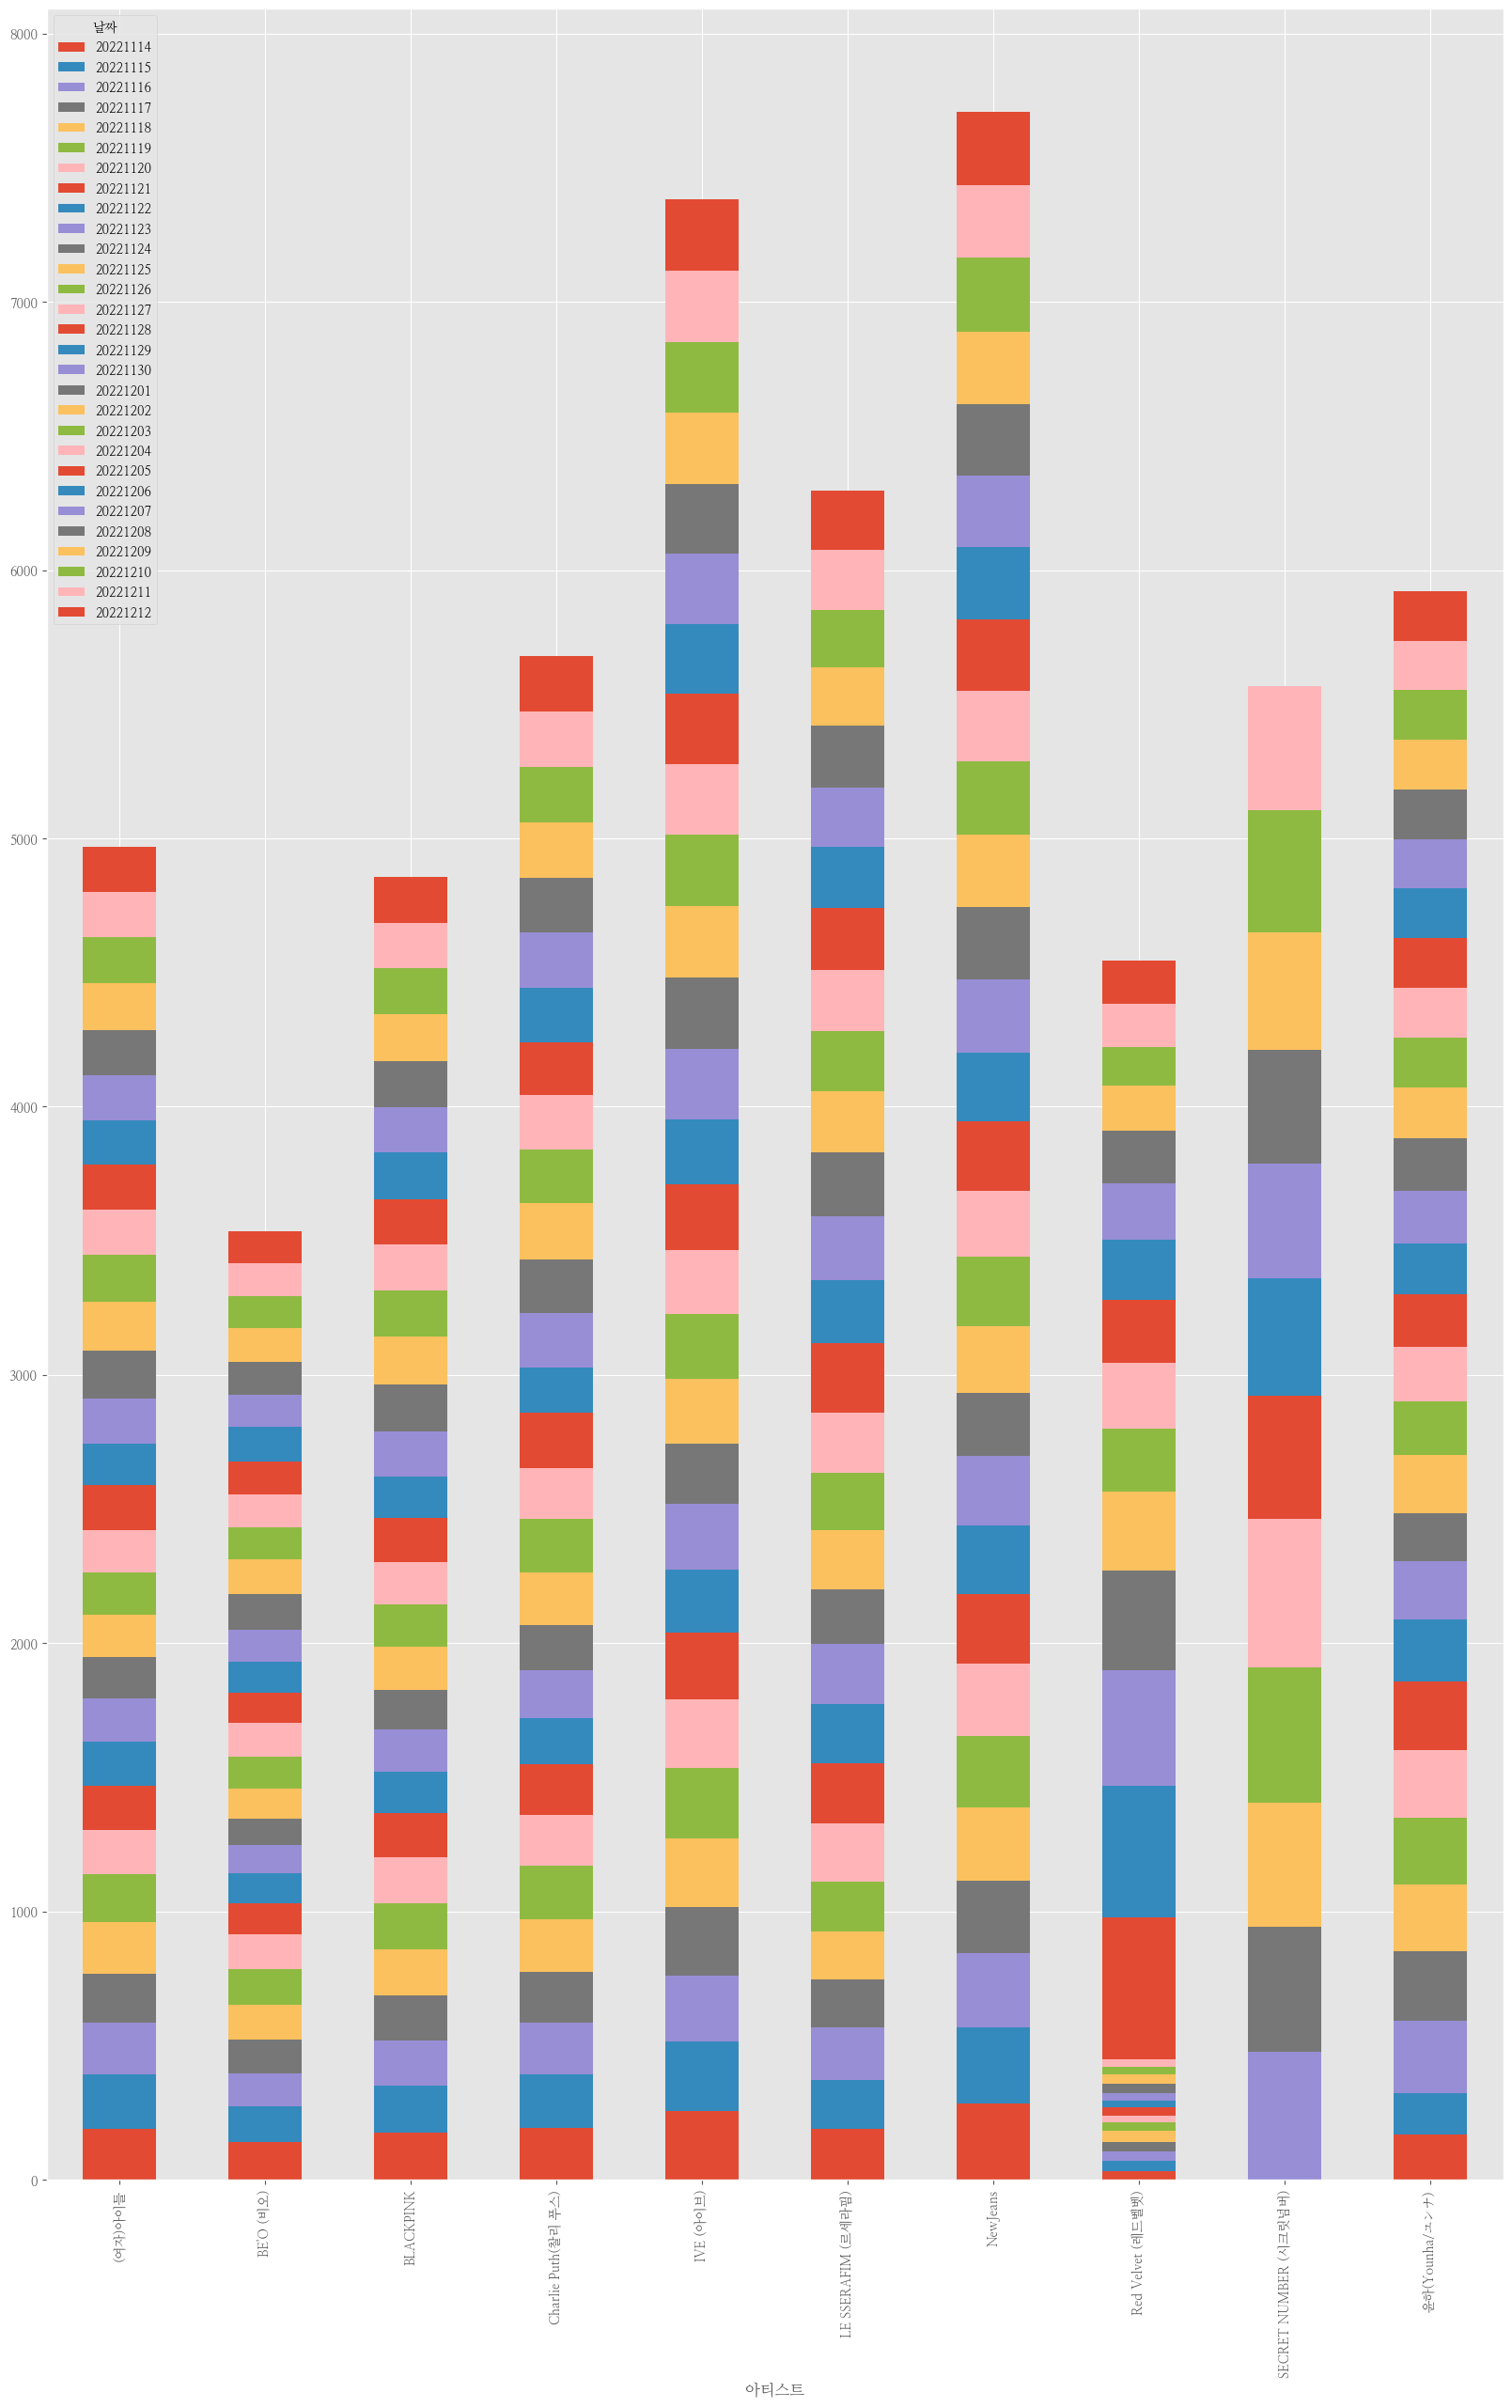

In [ ]:
df_bugs_values_top_pivot.plot(kind="bar", stacked=True, figsize=(20, 30)) 

In [ ]:
# 과제 
# naver 뮤비 리뷰
# https://movie.naver.com/movie/point/af/list.naver
# 100페이지 -> 하나의 datafram -> csv파일로 저장
# 크롤링
# 번호 감상평 점수1(원래점수) 점수2(7점이상 1, 7점이하 0)
# 방법1. bs 이용
# 방법2. pandas.read_html() #html에서 table정보만 추출
# python 멀티프로세싱 모듈